In [2]:
import os
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/SUITPy')
import getpass
import importlib
import tqdm

import scipy.io as sio
import rsatoolbox as rsa
from rsatoolbox.io import spm as spm_io
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import surfAnalysisPy as surf
import SUITPy as suit
import nibabel as nb
from nibabel import cifti2
import nitools as nt
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pathlib import Path
import seaborn as sns
import PcmPy as pcm
import Functional_Fusion.atlas_map as am
import Functional_Fusion.reliability as rel
import glob
import matplotlib.patches as patches
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist', 'data', 'fMRI')
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
behavDir = 'behavioural'
regDir = 'ROI'
atlasDir = '/Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32'
analysisDir = os.path.join(os.path.dirname(os.path.dirname(baseDir)), 'analysis')



## wb_view

In [ ]:
glm = 1
import subprocess
surfPy_dir = '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh'
atlas_temp_dir = '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/FS_LR_32'

names = ['lhand', 'rhand', 'bi', 'mvpa_rhand', 'mvpa_lhand', 'mvpa_bi', 'marginal_rhand', 'marginal_lhand','corr_intrinsic', 'corr_extrinsic']
hem = ['L', 'R']

# add paths:
paths = []
# add surface files:
# paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_L', f'fs_LR.32k.Lm.flat.surf.gii')))
# paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_R', f'fs_LR.32k.R.flat.surf.gii')))
paths.append(os.path.abspath(os.path.join(atlas_temp_dir, 'fs_LR.32k.L.inflated.surf.gii')))
paths.append(os.path.abspath(os.path.join(atlas_temp_dir, 'fs_LR.32k.R.inflated.surf.gii')))
paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_L', f'fs_LR.32k.LR.sulc.dscalar.nii')))

paths.append(os.path.abspath(os.path.join(atlas_temp_dir, 'ROI.32k.L.label.gii')))
paths.append(os.path.abspath(os.path.join(atlas_temp_dir, 'ROI.32k.R.label.gii')))

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}
paths.append(borders['L'])
paths.append(borders['R'])

# extended ROIs:
# paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/BA_handArea.32k.R.label.gii'))
# paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/BA_handArea.32k.L.label.gii'))
# paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/BAprobatlas.32k.R.func.gii'))
# paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/BAprobatlas.32k.L.func.gii'))

# add searchlight results:
for name in names:
    paths.append(os.path.abspath(os.path.join(baseDir, 'searchlight', f'glm{glm}_{name}_cortex.dscalar.nii')))
    
# Run wb_view:
subprocess.run(['wb_view', *paths])





Info: Resources loaded:
   :/About   :/BalsaUploadDialog   :/Cursor   :/DingOntology   :/Fonts   :/general_resources.qrc   :/help_resources.qrc   :/HelpFiles   :/LayersPanel   :/MessageDialog   :/PaletteEditorDialog   :/PaletteSettings   :/qpdf   :/qt-project.org   :/RecentFilesDialog   :/SceneFileDialog   :/SpecFileDialog   :/Splash   :/ToolBar   :/update_resources.sh


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/FS_LR_32/fs_LR.32k.L.inflated.surf.gii was 0.02513 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/FS_LR_32/fs_LR.32k.R.inflated.surf.gii was 0.026028 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.LR.sulc.dscalar.nii was 0.026586 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/FS_LR_32/ROI.32k.L.label.gii was 0.000501 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI

## surf plot

In [8]:
cmap = 'jet'
tmax = 6
threshold = 1.8
searchlight_names = ['mvpa_lhand', 'mvpa_rhand', 'mvpa_bi', 'marginal_lhand', 'marginal_rhand', 'lhand', 'rhand', 'bi']

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}
Hem = ['L', 'R']

for searchlight_name in searchlight_names: 
    D = {'L': np.zeros((32492)), 'R': np.zeros((32492))}
    sl_file = os.path.join(baseDir, 'searchlight', f'{searchlight_name}_cortex.dscalar.nii')
    data = nb.load(sl_file)
    d = data.get_fdata()
    d = d[-2,:] # tstatistics row
    D['L'] = np.array(d[:32492].reshape(-1,1))  # Left hemisphere data
    D['R'] = np.array(d[32492:].reshape(-1,1))  # Right hemisphere data
    
    # threshold the data:
    D['L'][np.abs(D['L']) < threshold] = np.nan
    D['R'][np.abs(D['R']) < threshold] = np.nan
    
    # Use abs
    vmax = tmax
    vmin = -vmax
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    for ax, H in zip(axs, Hem):
        plt.sca(ax)
        surf.plot.plotmap(D[H], f'fs32k_{H}',
                            underlay=None,
                            borders=borders[H],
                            cscale=[vmin, vmax],
                            cmap=cmap,
                            underscale=[-1.5, 1],
                            alpha=.4,
                            new_figure=False,
                            colorbar=False,
                            # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                            )
    # make colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap=cmap)
    cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
    cbar.set_label('avg distance')

    axs[0].set_title('Left hemisphere')
    axs[1].set_title('Right hemisphere')
    fig.suptitle(f'searchlight {searchlight_name}')
    fig.tight_layout()
    plt.savefig(f'../figures/glmsingle/searchlight/{searchlight_name}.pdf', bbox_inches="tight")
    plt.close()



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_5454/591244225.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_5454/591244225.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_5454/591244225.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_5454/591244225.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_5454/591244225.py:50: UserWarning: This figure includes Axes that are not compati

## surf plot sanity (tmap)

/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_94269/1980862388.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_94269/1980862388.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_94269/1980862388.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_94269/1980862388.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_94269/1980862388.py:52: UserWarning: This figure includes Axes that are n

KeyboardInterrupt: 

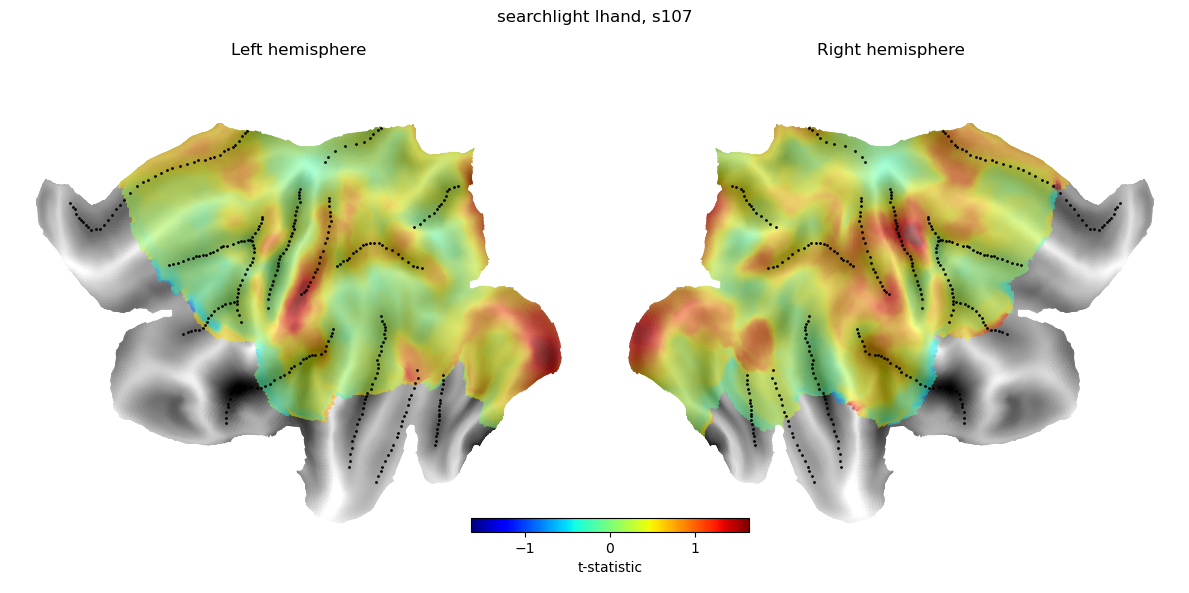

In [11]:
participants = [101,102,104,103,106,107,108,109,110,111,112,113,114,115]
cmap = 'jet'
tmax = 99.9
searchlight_names = ['lhand', 'rhand', 'bi']

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for searchlight_name in searchlight_names:
    for _, sn in enumerate(participants):
        Hem = ['L', 'R']
        D = {'L': np.zeros((32492)), 'R': np.zeros((32492))}
        for h in Hem:
            file = os.path.join(baseDir, 'searchlight', f'glm1_{searchlight_name}_s{sn}_{h}_cortex.dscalar.nii')  
            cifti_img = nb.load(file)
            data = cifti_img.get_fdata()
            header = cifti_img.header
            scalar_axis = header.get_axis(1)
            vertex_indices = scalar_axis.vertex

            D[h][vertex_indices] = data[0]
        
        # Combine data from both hemispheres
        all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
        # Use percentiles
        vmax = np.nanpercentile(all_data, tmax)
        vmin = -vmax
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        for ax, H in zip(axs, Hem):
            plt.sca(ax)
            surf.plot.plotmap(D[H], f'fs32k_{H}',
                                underlay=None,
                                borders=borders[H],
                                cscale=[vmin, vmax],
                                cmap=cmap,
                                underscale=[-1.5, 1],
                                alpha=.5,
                                new_figure=False,
                                colorbar=False,
                                # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                                )
        # make colorbar
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        sm = ScalarMappable(norm=norm, cmap=cmap)
        cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
        cbar.set_label('t-statistic')

        axs[0].set_title('Left hemisphere')
        axs[1].set_title('Right hemisphere')
        fig.suptitle(f'searchlight {searchlight_name}, s{sn}')
        fig.tight_layout()
        plt.savefig(f'../figures/glmsingle/searchlight/{searchlight_name}_s{sn}.pdf', bbox_inches="tight")
        plt.close()




## Concat Hems

In [4]:
glm = 1
participants = [101,104,106,107,108,109,110,111,112,113,114,115]
searchlight_names = ['corr_intrinsic','corr_extrinsic', 'mvpa_lhand', 'mvpa_rhand', 'mvpa_bi', 'marginal_lhand', 'marginal_rhand']
    
borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for _, sn in enumerate(participants):
    for searchlight_name in searchlight_names: 
        left_img = nb.load(os.path.join(baseDir, 'searchlight', f'glm{glm}_{searchlight_name}_s{sn}_L_cortex.dscalar.nii'))
        right_img = nb.load(os.path.join(baseDir, 'searchlight', f'glm{glm}_{searchlight_name}_s{sn}_R_cortex.dscalar.nii'))

        # Get axes - for dscalar: axis 0 is ScalarAxis, axis 1 is BrainModelAxes
        left_scalar_axis = left_img.header.get_axis(0)  # ScalarAxis
        right_scalar_axis = right_img.header.get_axis(0)  # ScalarAxis
        
        left_brain_axis = left_img.header.get_axis(1)  # BrainModelAxis (spatial)
        right_brain_axis = right_img.header.get_axis(1)  # BrainModelAxis (spatial)

        # Verify scalar axes are compatible (same number of scalars/maps)
        if left_scalar_axis != right_scalar_axis:
            print("Warning: ScalarAxis differ between hemispheres")
            # You might want to handle this case specifically

        # Get data
        left_data = left_img.get_fdata()
        left_data = np.sign(left_data) * np.sqrt(np.abs(left_data))  # retain sign
        right_data = right_img.get_fdata()
        right_data = np.sign(right_data) * np.sqrt(np.abs(right_data))  # retain sign

        # Concatenate BrainModelAxis (spatial axis)
        combined_brain_axis = left_brain_axis + right_brain_axis
        
        # Concatenate data along axis 1 (spatial dimension)
        combined_data = np.concatenate([left_data, right_data], axis=1)
        
        # Create new axes tuple: (ScalarAxis, combined BrainModelAxis)
        new_axes = (left_scalar_axis, combined_brain_axis)
        
        # Create new header and image
        new_header = cifti2.Cifti2Header.from_axes(new_axes)
        new_img = cifti2.Cifti2Image(combined_data, new_header)
        
        # Save
        nb.save(new_img, os.path.join(baseDir, 'searchlight', f'glm{glm}_{searchlight_name}_s{sn}_cortex.dscalar.nii'))



## Concat subjects

In [3]:
glm = 1
participants = [101,104,106,107,108,109,110,111,112,113,114,115]
searchlight_names = ['corr_intrinsic', 'corr_extrinsic', 'mvpa_lhand', 'mvpa_rhand', 'mvpa_bi', 'marginal_lhand', 'marginal_rhand']

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for searchlight_name in searchlight_names: 
    subj_files = []
    for _, sn in enumerate(participants):
        subj_files.append(os.path.join(baseDir, 'searchlight', f'glm{glm}_{searchlight_name}_s{sn}_cortex.dscalar.nii'))

    # Load all subject files
    subj_imgs = [nb.load(f) for f in subj_files]

    # Get scalar axes (axis 0) and brain model axes (axis 1)
    scalar_axes = [img.header.get_axis(0) for img in subj_imgs]
    brain_axes = [img.header.get_axis(1) for img in subj_imgs]

    # Get data arrays
    data_arrays = [img.get_fdata() for img in subj_imgs]

    # Verify all subjects have compatible spatial structure (BrainModelAxis)
    reference_brain_axis = brain_axes[0]
    for i, brain_axis in enumerate(brain_axes[1:], 1):
        if brain_axis != reference_brain_axis:
            raise ValueError(f"Subject {i} has incompatible spatial structure (BrainModelAxis)")
    
    print(f"Concatenating {len(subj_files)} subjects...")
    print(f"Data shapes: {[data.shape for data in data_arrays]}")

    # Concatenate scalar axes using the + operator
    combined_scalar_axis = scalar_axes[0]
    for scalar_axis in scalar_axes[1:]:
        combined_scalar_axis = combined_scalar_axis + scalar_axis

    print(f"Combined scalar axis size: {len(combined_scalar_axis)}")

    # Concatenate data along axis 0 (scalar dimension)
    combined_data = np.concatenate(data_arrays, axis=0)
    
    print(f"Final data shape: {combined_data.shape}")

    # Mean Across Subjects:
    mean_data = np.nanmean(combined_data, axis=0, keepdims=True)
    # tstats:
    std_data = np.nanstd(combined_data, axis=0, keepdims=True)
    DoF = np.sum(~np.isnan(combined_data), axis=0, keepdims=True) - 1  # Degrees of freedom
    tstats = mean_data / (std_data / np.sqrt(DoF+1))
    tstats[~np.isfinite(tstats)] = np.nan # handle voxels with no data

    if searchlight_name == 'corr_intrinsic' or searchlight_name == 'corr_extrinsic':
        # fissure z-transform each subject's r:
        combined_data_transformed = np.arctanh(combined_data)
        mean_data = np.nanmean(combined_data_transformed, axis=0, keepdims=True)

        # tstats:
        std_data = np.nanstd(combined_data_transformed, axis=0, keepdims=True)
        DoF = np.sum(~np.isnan(combined_data_transformed), axis=0, keepdims=True) - 1  # Degrees of freedom
        tstats = mean_data / (std_data / np.sqrt(DoF+1))
        tstats[~np.isfinite(tstats)] = np.nan # handle voxels with no data

        # transform back to r:
        mean_data = np.tanh(mean_data)

    # significant mask for two-sided t-test, DOF = 11:
    p05_mask = np.abs(tstats) > 2.2
    mean_data_p05 = mean_data * p05_mask

    p01_mask = np.abs(tstats) > 3.11
    mean_data_p01 = mean_data * p01_mask

    p001_mask = np.abs(tstats) > 4.44
    mean_data_p001 = mean_data * p001_mask


    # add to the data:
    combined_data = np.concatenate([combined_data, mean_data, mean_data_p05, mean_data_p01, mean_data_p001, tstats, DoF], axis=0)
    # update the scalar axis:
    combined_scalar_axis = combined_scalar_axis + cifti2.cifti2_axes.ScalarAxis(name=['mean'])
    combined_scalar_axis = combined_scalar_axis + cifti2.ScalarAxis(name=['mean_p05'])
    combined_scalar_axis = combined_scalar_axis + cifti2.ScalarAxis(name=['mean_p01'])
    combined_scalar_axis = combined_scalar_axis + cifti2.ScalarAxis(name=['mean_p001'])
    combined_scalar_axis = combined_scalar_axis + cifti2.ScalarAxis(name=['tstat'])
    combined_scalar_axis = combined_scalar_axis + cifti2.ScalarAxis(name=['DoF'])

    # Create new axes tuple: (combined ScalarAxis, BrainModelAxis)
    new_axes = (combined_scalar_axis, reference_brain_axis)

    # Create new header and image
    new_header = cifti2.Cifti2Header.from_axes(new_axes)
    new_img = cifti2.Cifti2Image(combined_data, new_header)
    
    # Save
    nb.save(new_img, os.path.join(baseDir, 'searchlight', f'glm{glm}_{searchlight_name}_cortex.dscalar.nii'))




Concatenating 12 subjects...
Data shapes: [(1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984)]
Combined scalar axis size: 12
Final data shape: (12, 64984)


/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_43783/3142579185.py:49: RuntimeWarning: divide by zero encountered in divide
  tstats = mean_data / (std_data / np.sqrt(DoF+1))
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_43783/3142579185.py:60: RuntimeWarning: divide by zero encountered in divide
  tstats = mean_data / (std_data / np.sqrt(DoF+1))


Concatenating 12 subjects...
Data shapes: [(1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984)]
Combined scalar axis size: 12
Final data shape: (12, 64984)
Concatenating 12 subjects...
Data shapes: [(1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984)]
Combined scalar axis size: 12
Final data shape: (12, 64984)
Concatenating 12 subjects...
Data shapes: [(1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984)]
Combined scalar axis size: 12
Final data shape: (12, 64984)
Concatenating 12 subjects...
Data shapes: [(1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984), (1, 64984)]
Combined scalar axis size: 12
Final data shape: (12, 64984)
Concatenatin

## debugging the patchy look

In [73]:
ni = nb.load('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_lhand_s101_cortex.dscalar.nii')

header = ni.header

brain_model_axis = header.get_axis(1)

a = np.array(ni.get_fdata())
a.shape

lhem = a[0,:32492]
rhem = a[0,32492:]

roi_L = nb.load('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.L.label.gii')
roi_R = nb.load('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.R.label.gii')
labels_L = roi_L.darrays[0].data
labels_R = roi_R.darrays[0].data

left_nan = np.where(np.isnan(lhem)) 
rhem_nan = np.where(np.isnan(rhem))

aa = labels_R[rhem_nan]
labels_R
np.unique(labels_R)



array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [77]:
import subprocess
surfPy_dir = '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh'

# add paths:
paths = []
# add surface files:
paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_L', f'fs_LR.32k.Lm.flat.surf.gii')))
paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_R', f'fs_LR.32k.R.flat.surf.gii')))
paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_L', f'fs_LR.32k.LR.sulc.dscalar.nii')))
paths.append(os.path.abspath(os.path.join(surfPy_dir, f'fs_L', f'fs_LR.32k.L.border')))

paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.L.label.gii'))
paths.append(os.path.abspath('/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.R.label.gii'))

paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_5802_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8139_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8210_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8267_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_16680_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_16675_surf.dscalar.nii')
paths.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_16738_surf.dscalar.nii')

# Run wb_view:
subprocess.run(['wb_view', *paths])




Info: Resources loaded:
   :/About   :/BalsaUploadDialog   :/Cursor   :/DingOntology   :/Fonts   :/general_resources.qrc   :/help_resources.qrc   :/HelpFiles   :/LayersPanel   :/MessageDialog   :/PaletteEditorDialog   :/PaletteSettings   :/qpdf   :/qt-project.org   :/RecentFilesDialog   :/SceneFileDialog   :/SpecFileDialog   :/Splash   :/ToolBar   :/update_resources.sh


Info: Time to read /Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.Lm.flat.surf.gii was 0.024471 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.flat.surf.gii was 0.023617 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.LR.sulc.dscalar.nii was 0.024933 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border was 0.002321 seconds.


Info: Time to read /Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k

CompletedProcess(args=['wb_view', '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.Lm.flat.surf.gii', '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.flat.surf.gii', '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.LR.sulc.dscalar.nii', '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border', '/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.L.label.gii', '/Volumes/Diedrichsen_data$/data/Atlas_templates/fs_LR_32/ROI.32k.R.label.gii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_5802_surf.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8139_surf.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8210_surf.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/center_s104_L_8267_surf.ds